In [2]:
import numpy as np 
import pandas as pd 
from sklearn.decomposition import PCA # Principal Component Analysis module
from sklearn.cluster import KMeans # KMeans clustering 
import matplotlib.pyplot as plt 
#import seaborn as sns # More snazzy plotting library
%matplotlib inline 

In [3]:
movie = pd.read_csv('movie_metadata.csv') # reads the csv and creates the dataframe called movie
movie.head()

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
0,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,...,3054.0,English,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000
1,Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Action|Adventure|Fantasy,...,1238.0,English,USA,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0
2,Color,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,200074175.0,Action|Adventure|Thriller,...,994.0,English,UK,PG-13,245000000.0,2015.0,393.0,6.8,2.35,85000
3,Color,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,448130642.0,Action|Thriller,...,2701.0,English,USA,PG-13,250000000.0,2012.0,23000.0,8.5,2.35,164000
4,NaN,Doug Walker,NaN,NaN,131.0,NaN,Rob Walker,131.0,NaN,Documentary,...,NaN,NaN,NaN,NaN,NaN,NaN,12.0,7.1,NaN,0


In [20]:
dtypes = list(zip(movie.columns,movie.dtypes))
sorted(dtypes, key=lambda x:x[1])

[('num_voted_users', dtype('int64')),
 ('cast_total_facebook_likes', dtype('int64')),
 ('movie_facebook_likes', dtype('int64')),
 ('num_critic_for_reviews', dtype('float64')),
 ('duration', dtype('float64')),
 ('director_facebook_likes', dtype('float64')),
 ('actor_3_facebook_likes', dtype('float64')),
 ('actor_1_facebook_likes', dtype('float64')),
 ('gross', dtype('float64')),
 ('facenumber_in_poster', dtype('float64')),
 ('num_user_for_reviews', dtype('float64')),
 ('budget', dtype('float64')),
 ('title_year', dtype('float64')),
 ('actor_2_facebook_likes', dtype('float64')),
 ('imdb_score', dtype('float64')),
 ('aspect_ratio', dtype('float64')),
 ('color', dtype('O')),
 ('director_name', dtype('O')),
 ('actor_2_name', dtype('O')),
 ('genres', dtype('O')),
 ('actor_1_name', dtype('O')),
 ('movie_title', dtype('O')),
 ('actor_3_name', dtype('O')),
 ('plot_keywords', dtype('O')),
 ('movie_imdb_link', dtype('O')),
 ('language', dtype('O')),
 ('country', dtype('O')),
 ('content_rating', d

In [4]:
str_list = [] # empty list to contain columns with strings (words)
for colname, colvalue in movie.iteritems():
    if type(colvalue[1]) == str:
         str_list.append(colname)
# Get to the numeric columns by inversion            
num_list = movie.columns.difference(str_list)

In [5]:
num_list

Index([u'actor_1_facebook_likes', u'actor_2_facebook_likes',
       u'actor_3_facebook_likes', u'aspect_ratio', u'budget',
       u'cast_total_facebook_likes', u'director_facebook_likes', u'duration',
       u'facenumber_in_poster', u'gross', u'imdb_score',
       u'movie_facebook_likes', u'num_critic_for_reviews',
       u'num_user_for_reviews', u'num_voted_users', u'title_year'],
      dtype='object')

In [6]:
movie_num = movie[num_list]
#del movie # Get rid of movie df as we won't need it now
movie_num.head()

,actor_1_facebook_likes,actor_2_facebook_likes,actor_3_facebook_likes,aspect_ratio,budget,cast_total_facebook_likes,director_facebook_likes,duration,facenumber_in_poster,gross,imdb_score,movie_facebook_likes,num_critic_for_reviews,num_user_for_reviews,num_voted_users,title_year
0,1000.0,936.0,855.0,1.78,237000000.0,4834,0.0,178.0,0.0,760505847.0,7.9,33000,723.0,3054.0,886204,2009.0
1,40000.0,5000.0,1000.0,2.35,300000000.0,48350,563.0,169.0,0.0,309404152.0,7.1,0,302.0,1238.0,471220,2007.0
2,11000.0,393.0,161.0,2.35,245000000.0,11700,0.0,148.0,1.0,200074175.0,6.8,85000,602.0,994.0,275868,2015.0
3,27000.0,23000.0,23000.0,2.35,250000000.0,106759,22000.0,164.0,0.0,448130642.0,8.5,164000,813.0,2701.0,1144337,2012.0
4,131.0,12.0,NaN,NaN,NaN,143,131.0,NaN,0.0,NaN,7.1,0,NaN,NaN,8,NaN


In [7]:
movie_num = movie_num.fillna(value=0, axis=1)

In [8]:
X = movie_num.values
# Data Normalization
from sklearn.preprocessing import StandardScaler
X_std = StandardScaler().fit_transform(X)

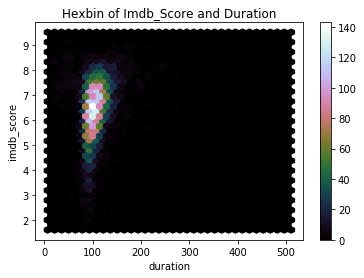

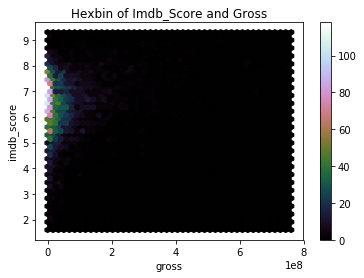

In [9]:
movie.plot(y= 'imdb_score', x ='duration',kind='hexbin',gridsize=35, sharex=False, colormap='cubehelix', title='Hexbin of Imdb_Score and Duration')
movie.plot(y= 'imdb_score', x ='gross',kind='hexbin',gridsize=45, sharex=False, colormap='cubehelix', title='Hexbin of Imdb_Score and Gross')

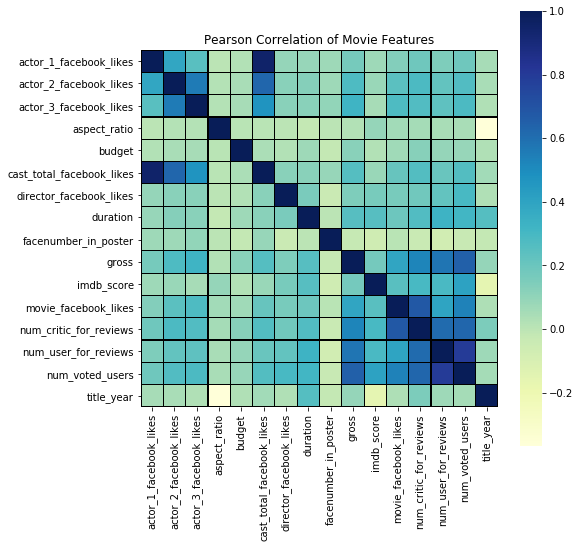

In [21]:
# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(8, 8))
plt.title('Pearson Correlation of Movie Features')
# Draw the heatmap using seaborn
sns.heatmap(movie_num.astype(float).corr(),linewidths=0.25,vmax=1.0, square=True, cmap="YlGnBu", linecolor='black')

In [11]:
# Calculating Eigenvectors and eigenvalues of Cov matirx
mean_vec = np.mean(X_std, axis=0)
cov_mat = np.cov(X_std.T)
eig_vals, eig_vecs = np.linalg.eig(cov_mat)

In [12]:
# Create a list of (eigenvalue, eigenvector) tuples
eig_pairs = [ (np.abs(eig_vals[i]),eig_vecs[:,i]) for i in range(len(eig_vals))]

# Sort from high to low
eig_pairs.sort(key = lambda x: x[0], reverse= True)

# Calculation of Explained Variance from the eigenvalues
tot = sum(eig_vals)
var_exp = [(i/tot)*100 for i in sorted(eig_vals, reverse=True)] # Individual explained variance
cum_var_exp = np.cumsum(var_exp) # Cumulative explained variance

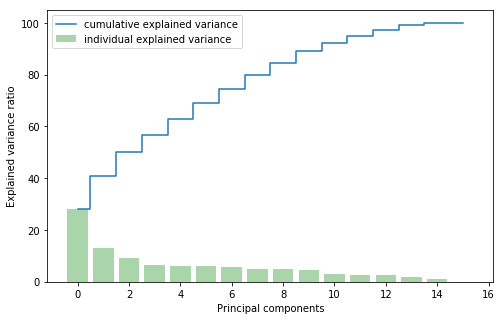

In [13]:
# PLOT OUT THE EXPLAINED VARIANCES SUPERIMPOSED 
plt.figure(figsize=(8, 5))
plt.bar(range(16), var_exp, alpha=0.3333, align='center', label='individual explained variance', color = 'g')
plt.step(range(16), cum_var_exp, where='mid',label='cumulative explained variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal components')
plt.legend(loc='best')
plt.show()

In [14]:
pca = PCA(n_components=9)
x_9d = pca.fit_transform(X_std)

In [15]:
X_std.shape

(5043, 16)

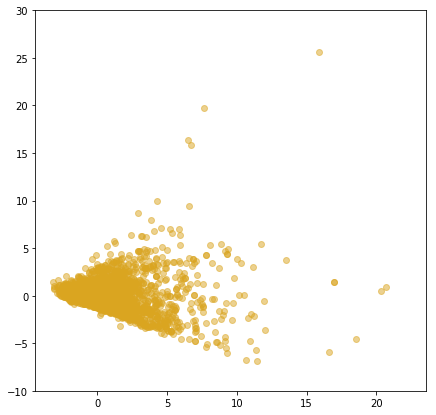

In [16]:
plt.figure(figsize = (7,7))
plt.scatter(x_9d[:,0],x_9d[:,1], c='goldenrod',alpha=0.5)
plt.ylim(-10,30)
plt.show()

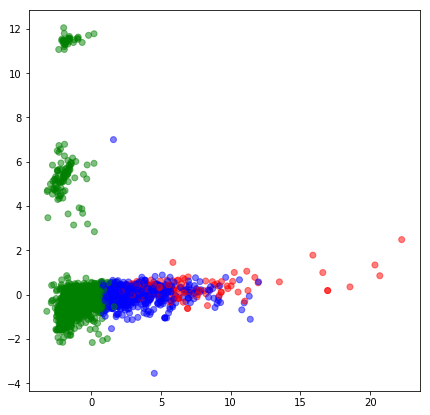

In [17]:
# Set a 3 KMeans clustering
kmeans = KMeans(n_clusters=3)
# Compute cluster centers and predict cluster indices
X_clustered = kmeans.fit_predict(x_9d)

# Define our own color map
LABEL_COLOR_MAP = {0 : 'r',1 : 'g',2 : 'b'}
label_color = [LABEL_COLOR_MAP[l] for l in X_clustered]

# Plot the scatter digram
plt.figure(figsize = (7,7))
plt.scatter(x_9d[:,0],x_9d[:,2], c= label_color, alpha=0.5) 
plt.show()

In [22]:
# Create a temp dataframe from our PCA projection data "x_9d"
df = pd.DataFrame(x_9d)
df = df[[0,1,2]] # only want to visualise relationships between first 3 projections
df['X_cluster'] = X_clustered

/home/ai4u/build/anaconda2/envs/tf_built/lib/python2.7/site-packages/seaborn/axisgrid.py:2080: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


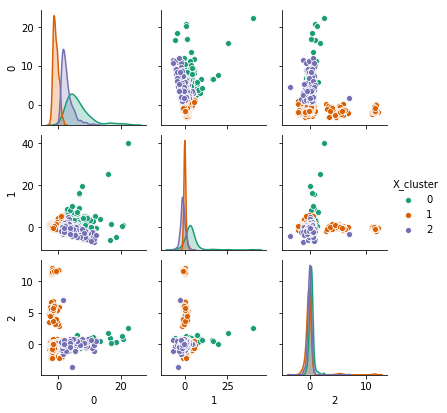

In [23]:
# Call Seaborn's pairplot to visualize our KMeans clustering on the PCA projected data
sns.pairplot(df, hue='X_cluster', palette= 'Dark2', diag_kind='kde',size=1.85)

(-2, 2)

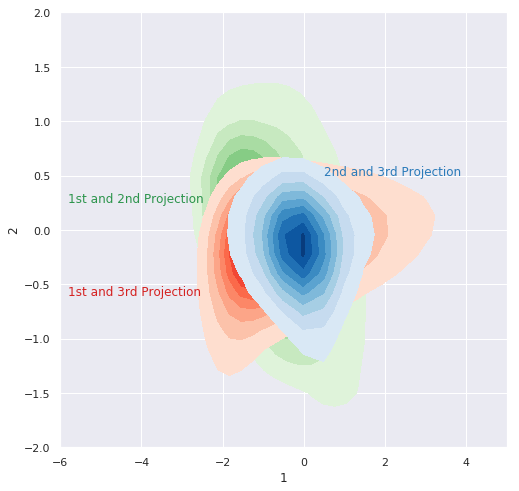

In [24]:
sns.set(style='darkgrid')
f, ax = plt.subplots(figsize=(8, 8))
# ax.set_aspect('equal')
ax = sns.kdeplot(df[0], df[1], cmap="Greens",
          shade=True, shade_lowest=False)
ax = sns.kdeplot(df[0], df[2], cmap="Reds",
          shade=True, shade_lowest=False)
ax = sns.kdeplot(df[1], df[2], cmap="Blues",
          shade=True, shade_lowest=False)
red = sns.color_palette("Reds")[-2]
blue = sns.color_palette("Blues")[-2]
green = sns.color_palette("Greens")[-2]
ax.text(0.5, 0.5, "2nd and 3rd Projection", size=12, color=blue)
ax.text(-5.8, -0.6, "1st and 3rd Projection", size=12, color=red)
ax.text(-5.8, 0.25, "1st and 2nd Projection", size=12, color=green)
plt.xlim(-6,5)
plt.ylim(-2,2)